In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from PIL import Image





EDA

<AxesSubplot: >

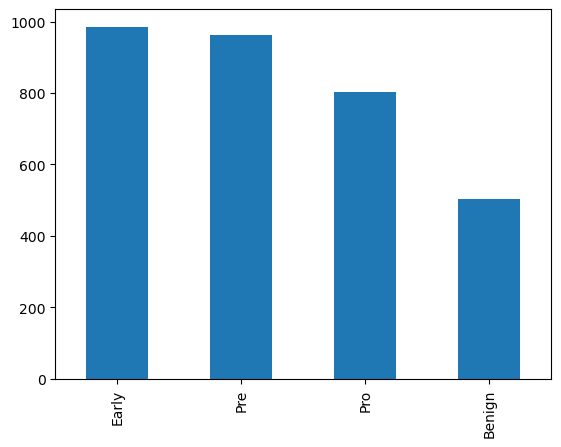

In [27]:
pictures=[]
for Dir in os.listdir('Original'):
    for dir1 in os.listdir('Original'+'\\'+str(Dir)):
        pictures.append(('Original'+'\\'+str(Dir)+'\\'+dir1,Dir,dir1))
        
#get an histogram with the amount of images per category
df=pd.DataFrame(pictures,columns=['Dir','Category','Image'])
df['Category'].value_counts().plot(kind='bar')

In [28]:
df

Dir Category  \
0         Original\Benign\WBC-Benign-001.jpg   Benign   
1         Original\Benign\WBC-Benign-002.jpg   Benign   
2         Original\Benign\WBC-Benign-003.jpg   Benign   
3         Original\Benign\WBC-Benign-004.jpg   Benign   
4         Original\Benign\WBC-Benign-005.jpg   Benign   
...                                      ...      ...   
3251  Original\Pro\WBC-Malignant-Pro-800.jpg      Pro   
3252  Original\Pro\WBC-Malignant-Pro-801.jpg      Pro   
3253  Original\Pro\WBC-Malignant-Pro-802.jpg      Pro   
3254  Original\Pro\WBC-Malignant-Pro-803.jpg      Pro   
3255  Original\Pro\WBC-Malignant-Pro-804.jpg      Pro   

                          Image  
0            WBC-Benign-001.jpg  
1            WBC-Benign-002.jpg  
2            WBC-Benign-003.jpg  
3            WBC-Benign-004.jpg  
4            WBC-Benign-005.jpg  
...                         ...  
3251  WBC-Malignant-Pro-800.jpg  
3252  WBC-Malignant-Pro-801.jpg  
3253  WBC-Malignant-Pro-802.jpg  
3254  WBC-Malignant-Pro-803.jpg  
3255  WBC-Malignant-Pro-804.jpg  

[3256 rows x 3 columns]

In [29]:
##open jpg file from directory
size=[]
color=[]
color1=[]

for image in df.Dir:
    I = np.asarray(Image.open(image))
    im = Image.fromarray(np.uint8(I))

    #get the color of the image
    color.append(im.mode)
    

    ##show image
    size.append(np.shape(I))
    #im.show(im)
df['size']=size 
df['Mode']=color

df

Dir Category  \
0         Original\Benign\WBC-Benign-001.jpg   Benign   
1         Original\Benign\WBC-Benign-002.jpg   Benign   
2         Original\Benign\WBC-Benign-003.jpg   Benign   
3         Original\Benign\WBC-Benign-004.jpg   Benign   
4         Original\Benign\WBC-Benign-005.jpg   Benign   
...                                      ...      ...   
3251  Original\Pro\WBC-Malignant-Pro-800.jpg      Pro   
3252  Original\Pro\WBC-Malignant-Pro-801.jpg      Pro   
3253  Original\Pro\WBC-Malignant-Pro-802.jpg      Pro   
3254  Original\Pro\WBC-Malignant-Pro-803.jpg      Pro   
3255  Original\Pro\WBC-Malignant-Pro-804.jpg      Pro   

                          Image           size Mode  
0            WBC-Benign-001.jpg  (224, 224, 3)  RGB  
1            WBC-Benign-002.jpg  (224, 224, 3)  RGB  
2            WBC-Benign-003.jpg  (224, 224, 3)  RGB  
3            WBC-Benign-004.jpg  (224, 224, 3)  RGB  
4            WBC-Benign-005.jpg  (224, 224, 3)  RGB  
...                         ...            ...  ...  
3251  WBC-Malignant-Pro-800.jpg  (224, 224, 3)  RGB  
3252  WBC-Malignant-Pro-801.jpg  (224, 224, 3)  RGB  
3253  WBC-Malignant-Pro-802.jpg  (224, 224, 3)  RGB  
3254  WBC-Malignant-Pro-803.jpg  (224, 224, 3)  RGB  
3255  WBC-Malignant-Pro-804.jpg  (224, 224, 3)  RGB  

[3256 rows x 5 columns]

<AxesSubplot: >

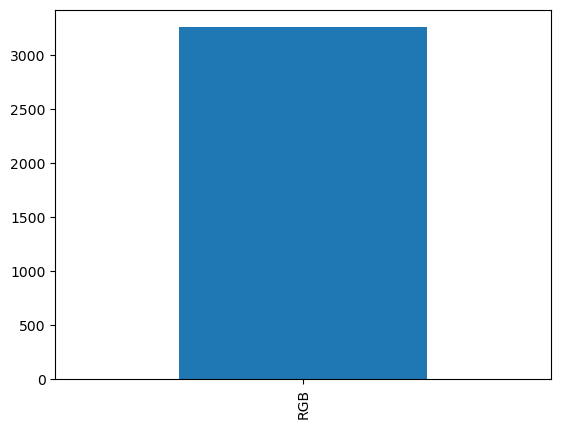

In [30]:
df['Mode'].value_counts().plot(kind='bar')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Dir       3256 non-null   object
 1   Category  3256 non-null   object
 2   Image     3256 non-null   object
 3   size      3256 non-null   object
 4   Mode      3256 non-null   object
dtypes: object(5)
memory usage: 127.3+ KB


In [33]:
df.describe()

Dir Category               Image  \
count                                 3256     3256                3256   
unique                                3256        4                3256   
top     Original\Benign\WBC-Benign-001.jpg    Early  WBC-Benign-001.jpg   
freq                                     1      985                   1   

                 size  Mode  
count            3256  3256  
unique              1     1  
top     (224, 224, 3)   RGB  
freq             3256  3256

In [35]:
## function to do Adaptive histogram equalization
def adaptive_hist_eq(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(image)
    return cl1

## function to do histogram normalization
def hist_norm(image):
    norm_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return norm_image

In [140]:
##function that gets all the pictures from the directory and apply the adaptive histogram equalization
def get_images_processing(directory, processing='adaptive_histogram_equalization'):
    images=[]
    for dir in os.listdir(directory):
        for dir1 in os.listdir('Original'+'\\'+str(dir)):
            img = cv2.imread(directory+'\\'+dir+'\\'+dir1)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            if processing == 'adaptive_histogram_equalization':
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = adaptive_hist_eq(img)
            elif processing == 'histogram_normalization':
                img = hist_norm(img)   
            elif processing == 'sharpening':
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                img = cv2.filter2D(img, -1, kernel)
            else:
                img = img
            
            images.append(img)
    return images

Adaptive histogram equalization (AHE) is a technique that improves the contrast of an image by redistributing pixel values in a way that enhances the visibility of features. AHE works by dividing the image into small regions called "tiles," computing the histogram of pixel intensities for each tile, and then adjusting the pixel values in each tile based on the histogram of the neighboring tiles.

AHE is often applied to grayscale images because the histogram of pixel intensities in a grayscale image represents the distribution of the different shades of gray in the image. By modifying the histogram of the image, AHE can enhance the contrast of the image and bring out more detail.

In color images, each pixel is represented by a combination of red, green, and blue color channels. Applying AHE to color images can be challenging because the technique needs to be modified to work with multiple channels, and adjusting the histogram of one channel can affect the color balance of the image. Therefore, it is common practice to convert color images to grayscale before applying AHE to enhance the image contrast.

In [143]:
images_smooth=get_images_processing('Original','adaptive_histogram_equalization')
images_color_norm=get_images_processing('Original','histogram_normalization')
images_sharpening=get_images_processing('Original','sharpening')
df['images_smooth']=images_smooth
df['images_color_norm']=images_color_norm
df['images_sharpening']=images_sharpening

In [144]:
df

Dir Category  \
0         Original\Benign\WBC-Benign-001.jpg   Benign   
1         Original\Benign\WBC-Benign-002.jpg   Benign   
2         Original\Benign\WBC-Benign-003.jpg   Benign   
3         Original\Benign\WBC-Benign-004.jpg   Benign   
4         Original\Benign\WBC-Benign-005.jpg   Benign   
...                                      ...      ...   
3251  Original\Pro\WBC-Malignant-Pro-800.jpg      Pro   
3252  Original\Pro\WBC-Malignant-Pro-801.jpg      Pro   
3253  Original\Pro\WBC-Malignant-Pro-802.jpg      Pro   
3254  Original\Pro\WBC-Malignant-Pro-803.jpg      Pro   
3255  Original\Pro\WBC-Malignant-Pro-804.jpg      Pro   

                          Image           size Mode  \
0            WBC-Benign-001.jpg  (224, 224, 3)  RGB   
1            WBC-Benign-002.jpg  (224, 224, 3)  RGB   
2            WBC-Benign-003.jpg  (224, 224, 3)  RGB   
3            WBC-Benign-004.jpg  (224, 224, 3)  RGB   
4            WBC-Benign-005.jpg  (224, 224, 3)  RGB   
...                         ...            ...  ...   
3251  WBC-Malignant-Pro-800.jpg  (224, 224, 3)  RGB   
3252  WBC-Malignant-Pro-801.jpg  (224, 224, 3)  RGB   
3253  WBC-Malignant-Pro-802.jpg  (224, 224, 3)  RGB   
3254  WBC-Malignant-Pro-803.jpg  (224, 224, 3)  RGB   
3255  WBC-Malignant-Pro-804.jpg  (224, 224, 3)  RGB   

                                          images_smooth  \
0     [[226, 226, 229, 232, 232, 237, 242, 242, 239,...   
1     [[172, 165, 165, 179, 201, 217, 221, 219, 212,...   
2     [[204, 201, 210, 206, 208, 173, 147, 109, 108,...   
3     [[209, 207, 214, 173, 166, 202, 207, 214, 216,...   
4     [[207, 191, 100, 103, 114, 118, 121, 121, 146,...   
...                                                 ...   
3251  [[110, 117, 127, 138, 151, 167, 182, 189, 205,...   
3252  [[201, 173, 151, 138, 127, 129, 134, 129, 142,...   
3253  [[152, 141, 130, 127, 123, 121, 123, 127, 123,...   
3254  [[121, 118, 93, 101, 128, 157, 182, 169, 160, ...   
3255  [[175, 197, 204, 216, 214, 219, 216, 221, 221,...   

                                      images_color_norm  \
0     [[[253, 240, 244], [253, 240, 244], [255, 240,...   
1     [[[239, 192, 201], [234, 188, 198], [231, 189,...   
2     [[[249, 226, 231], [246, 225, 230], [248, 230,...   
3     [[[245, 221, 230], [247, 220, 229], [255, 221,...   
4     [[[239, 219, 234], [246, 209, 225], [211, 139,...   
...                                                 ...   
3251  [[[220, 168, 167], [221, 172, 170], [223, 176,...   
3252  [[[243, 209, 214], [231, 196, 200], [228, 185,...   
3253  [[[234, 187, 188], [230, 181, 182], [229, 176,...   
3254  [[[217, 179, 179], [220, 178, 178], [218, 164,...   
3255  [[[238, 198, 198], [249, 211, 211], [248, 217,...   

                                      images_sharpening  
0     [[244, 245, 245, 249, 236, 242, 250, 249, 240,...  
1     [[187, 161, 160, 192, 231, 234, 218, 224, 234,...  
2     [[233, 219, 255, 233, 255, 157, 143, 4, 79, 12...  
3     [[234, 235, 255, 255, 255, 255, 255, 255, 255,...  
4     [[255, 255, 0, 89, 220, 215, 220, 194, 249, 25...  
...                                                 ...  
3251  [[155, 171, 171, 174, 177, 194, 207, 196, 239,...  
3252  [[255, 255, 251, 234, 202, 222, 251, 225, 255,...  
3253  [[243, 206, 186, 187, 180, 178, 184, 187, 136,...  
3254  [[175, 196, 123, 153, 222, 255, 255, 255, 255,...  
3255  [[182, 255, 234, 249, 216, 234, 217, 236, 232,...  

[3256 rows x 8 columns]

In [142]:
print(np.shape(images_smooth),np.shape(images_smooth[0][1]))
print(np.shape(images_color_norm),np.shape(images_color_norm[0]))
print(np.shape(images_sharpening),np.shape(images_sharpening[0]))

(3256, 224, 224) (224,)
(3256, 224, 224, 3) (224, 224, 3)
(3256, 224, 224) (224, 224)


In [146]:
##function to show a batch of images
def show_images(images,technique='images_smooth'):
    images=images[technique]
    
    for i in range(0,20):
        plt.subplot(4,5,i+1)
        plt.title(df.Category[i])
        plt.imshow(images[i][1],cmap='gray')
        #increase the size of the image
        plt.rcParams["figure.figsize"] = (20,20)
    plt.show()

TypeError: Invalid shape (224,) for image data

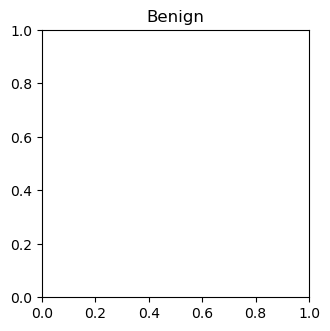

In [147]:
show_images(df,'images_smooth')

In [138]:
##function to show a batch of images
def show_images(images):
    
   
    print(np.shape(images))
    for i in range(0,20):
        plt.subplot(4,5,i+1)
        plt.title(df.Category[i])
        plt.imshow(images[i][1],cmap='gray')
        #increase the size of the image
        plt.rcParams["figure.figsize"] = (20,20)
    plt.show()

In [139]:
show_images(images_smooth)

C:\conda_tmp\ipykernel_20880\3192153577.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images=np.random.choice(images,20)


ValueError: a must be 1-dimensional

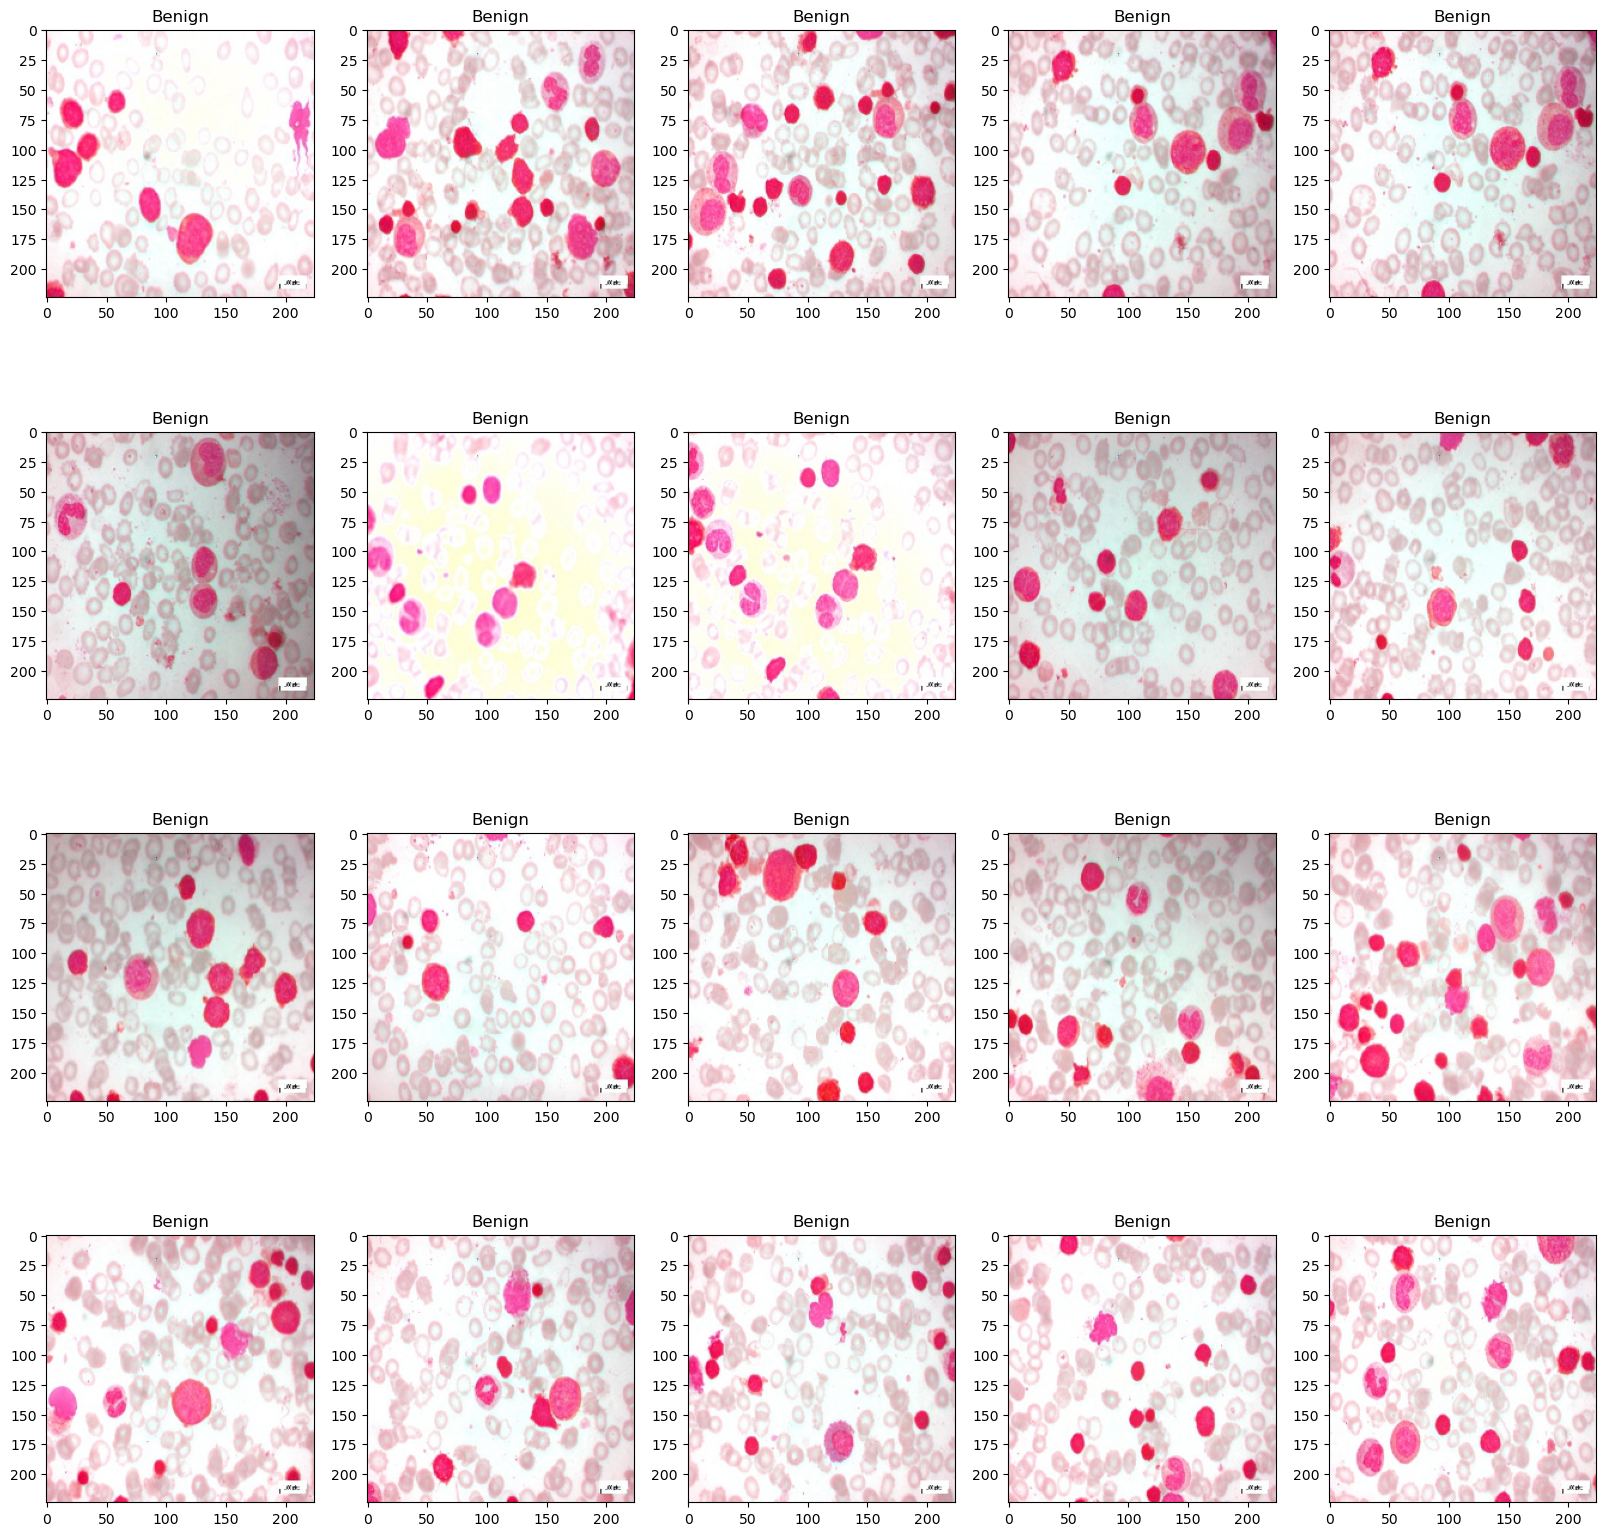

In [106]:
show_images(images_color_norm)

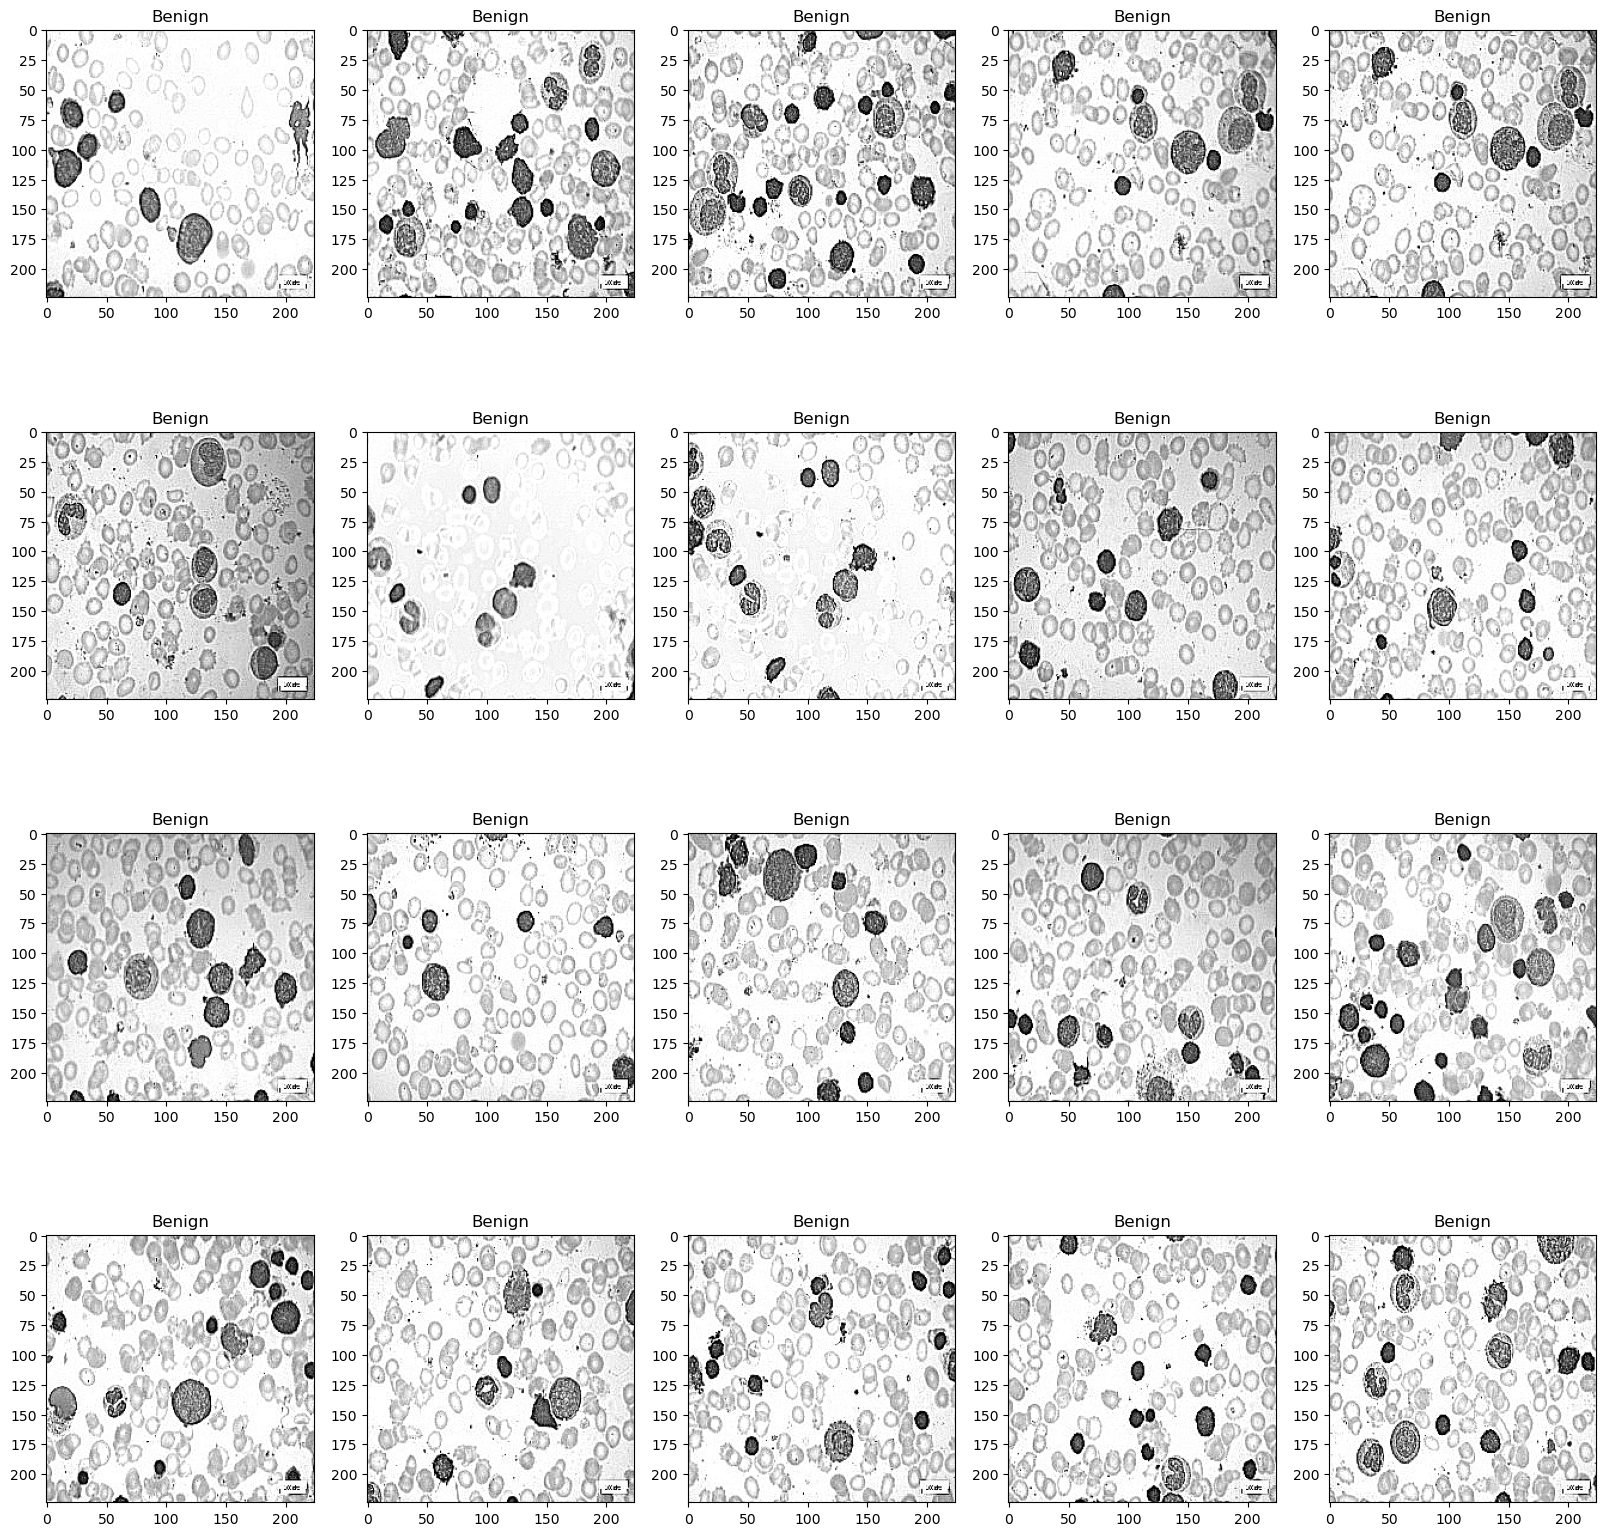

In [107]:
show_images(images_sharpening)